In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import MinMaxScaler

In [36]:
df = pd.read_csv('test_set_VU_DM.csv')
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,3180,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,5543,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,14142,2,3.5,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,22393,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,24194,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv

# Dealing with nan values

In [38]:
# Inspect which columns have NaN values
columns_with_nan = df.columns[df.isna().any()].tolist()
print(columns_with_nan)

['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_review_score', 'prop_location_score2', 'srch_query_affinity_score', 'orig_destination_distance', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff']


In [39]:
missing_df = pd.DataFrame(df.isnull().sum()/len(df))*100
missing_df.reset_index(inplace=True)
missing_df.rename(columns={0: 'percentage', 'index':'column'}, inplace=True)
missing_df = missing_df.sort_values(by = 'percentage', ascending = False)
missing_df

,column,percentage
28,comp1_rate_percent_diff,98.175748
43,comp6_rate_percent_diff,98.041250
26,comp1_rate,97.663405
27,comp1_inv,97.481964
37,comp4_rate_percent_diff,97.315546
46,comp7_rate_percent_diff,97.190606
41,comp6_rate,95.113510
4,visitor_hist_starrating,94.889662
5,visitor_hist_adr_usd,94.865606
42,comp6_inv,94.693299


Impute column prop_review_score

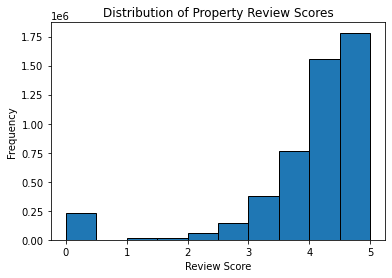

In [40]:
# Plotting a histogram
plt.hist(df['prop_review_score'].dropna(), bins=10, edgecolor='k')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Property Review Scores')
plt.show()

In [41]:
# Fill the missing values with the median, as the data is not distributed normally
df['prop_review_score'].fillna(0, inplace=True)

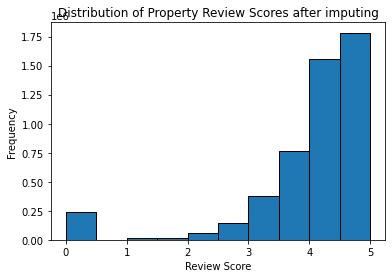

In [42]:
# Again plot the data
# Plotting a histogram
plt.hist(df['prop_review_score'].dropna(), bins=10, edgecolor='k')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.title('Distribution of Property Review Scores after imputing')
plt.show()

Impute column prop_location_score2

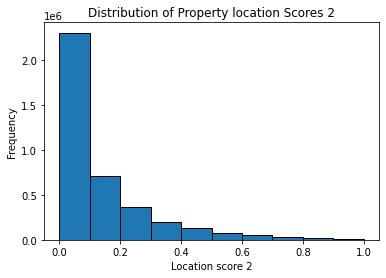

In [43]:
# Plotting a histogram
plt.hist(df['prop_location_score2'].dropna(), bins=10, edgecolor='k')
plt.xlabel('Location score 2')
plt.ylabel('Frequency')
plt.title('Distribution of Property location Scores 2')
plt.show()

In [44]:
# Get non-missing values from the column
non_missing_values = df['prop_location_score2'].dropna()

# Calculate the lambda parameter of the exponential distribution
lambda_param = 1 / non_missing_values.mean()

# Generate random values based on the exponential distribution
random_values = np.random.exponential(scale=1/lambda_param, size=df['prop_location_score2'].isna().sum())

# Fill the missing values with the generated random values
df.loc[df['prop_location_score2'].isna(), 'prop_location_score2'] = random_values

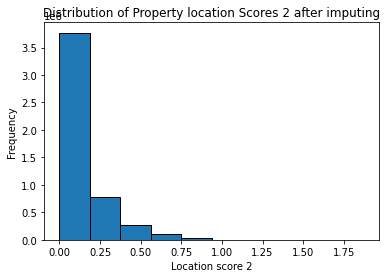

In [45]:
# Plotting a histogram
plt.hist(df['prop_location_score2'].dropna(), bins=10, edgecolor='k')
plt.xlabel('Location score 2')
plt.ylabel('Frequency')
plt.title('Distribution of Property location Scores 2 after imputing')
plt.show()

Impute column orig_destination_distance

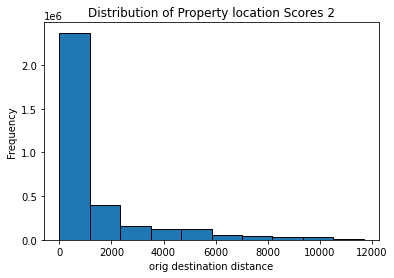

In [46]:
# Plotting a histogram
plt.hist(df['orig_destination_distance'].dropna(), bins=10, edgecolor='k')
plt.xlabel('orig destination distance')
plt.ylabel('Frequency')
plt.title('Distribution of Property location Scores 2')
plt.show()

In [47]:
# Get non-missing values from the column
non_missing_values = df['orig_destination_distance'].dropna()

# Reshape the values for input to KDE
values = non_missing_values.values.reshape(-1, 1)

# Create and fit the KDE model
kde = KernelDensity(bandwidth=0.75)  # Adjust the bandwidth as needed
kde.fit(values)

# Generate random values based on the KDE model
random_values = kde.sample(df['orig_destination_distance'].isna().sum()).reshape(-1)

# Fill the missing values with the generated random values
df.loc[df['orig_destination_distance'].isna(), 'orig_destination_distance'] = random_values

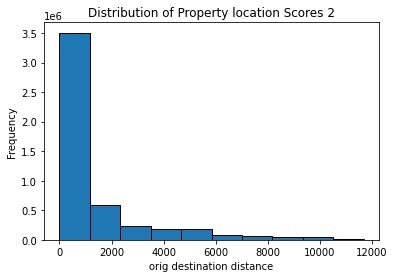

In [48]:
# Plotting a histogram
plt.hist(df['orig_destination_distance'].dropna(), bins=10, edgecolor='k')
plt.xlabel('orig destination distance')
plt.ylabel('Frequency')
plt.title('Distribution of Property location Scores 2')
plt.show()

Remove columns that have more that 50% missing values

In [49]:
threshold = len(df) * 0.5  # Set the threshold as 50% of the total rows
df.dropna(thresh=threshold, axis=1, inplace=True)

In [50]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool'],
      dtype='object')

# Creating features

In [51]:
# Encode categorical columns as categories
categorical_cols = ['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'srch_destination_id']
df[categorical_cols] = df[categorical_cols].astype('category')

In [52]:
train_df_2 = df.copy()

In [53]:
cols_to_freq_encode =  ['site_id', 'visitor_location_country_id', 'prop_country_id', 'srch_destination_id']
for col in cols_to_freq_encode:
    freq = train_df_2[col].value_counts(normalize=True)
    freq.to_csv(f'{col}_freq_encodings.csv')
    train_df_2[col] = train_df_2[col].apply(lambda x : round(freq[x]))

### Normalizing columns to reduce the impact of large values on the modeling
- particularly price column since it will vary based on location and to reduce its impact from shadowning other attributes

In [54]:
scaler = MinMaxScaler()
columns_to_normalize = ['price_usd']
train_df_2[columns_to_normalize] = scaler.fit_transform(train_df_2[columns_to_normalize])

### Extracting month from date attribute

In [55]:
train_df_2['date_time'] = pd.to_datetime(train_df_2['date_time'])
train_df_2['month'] = train_df_2['date_time'].dt.month
train_df_2 =  train_df_2.drop('date_time', axis=1)

### Add features

In [56]:
train_df_2.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,month
0,1,0,0,1,3180,3,4.5,1,2.94,0.0691,...,0,1,10,2,0,1,0,1142.224433,0,2
1,1,0,0,1,5543,3,4.5,1,2.64,0.0843,...,0,1,10,2,0,1,0,722.268125,0,2
2,1,0,0,1,14142,2,3.5,1,2.71,0.0556,...,0,1,10,2,0,1,0,204.354003,0,2
3,1,0,0,1,22393,3,4.5,1,2.40,0.0561,...,0,1,10,2,0,1,0,536.097209,0,2
4,1,0,0,1,24194,3,4.5,1,2.94,0.2090,...,0,1,10,2,0,1,0,1467.464833,0,2


Add a column with an interaction between prop-starrating and prop_location_score1 to represent the overall desirability of a hotel based on star rating and location score

In [57]:
# Create a new feature by multiplying 'prop_starrating' and 'prop_location_score1'
train_df_2['prop_starrating_location_interaction'] = train_df_2['prop_starrating'] * train_df_2['prop_location_score1']

In [58]:
train_df_2.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,month,prop_starrating_location_interaction
0,1,0,0,1,3180,3,4.5,1,2.94,0.0691,...,1,10,2,0,1,0,1142.224433,0,2,8.82
1,1,0,0,1,5543,3,4.5,1,2.64,0.0843,...,1,10,2,0,1,0,722.268125,0,2,7.92
2,1,0,0,1,14142,2,3.5,1,2.71,0.0556,...,1,10,2,0,1,0,204.354003,0,2,5.42
3,1,0,0,1,22393,3,4.5,1,2.40,0.0561,...,1,10,2,0,1,0,536.097209,0,2,7.20
4,1,0,0,1,24194,3,4.5,1,2.94,0.2090,...,1,10,2,0,1,0,1467.464833,0,2,8.82


In [59]:
# Create a new feature interaction between price_usd and prop_log_historical_price to capture the 
# relative price compared to historical prices 
train_df_2['price_historical_interaction'] = train_df_2['price_usd'] * train_df_2['prop_log_historical_price']

In [60]:
train_df_2.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,month,prop_starrating_location_interaction,price_historical_interaction
0,1,0,0,1,3180,3,4.5,1,2.94,0.0691,...,10,2,0,1,0,1142.224433,0,2,8.82,0.000062
1,1,0,0,1,5543,3,4.5,1,2.64,0.0843,...,10,2,0,1,0,722.268125,0,2,7.92,0.000060
2,1,0,0,1,14142,2,3.5,1,2.71,0.0556,...,10,2,0,1,0,204.354003,0,2,5.42,0.000021
3,1,0,0,1,22393,3,4.5,1,2.40,0.0561,...,10,2,0,1,0,536.097209,0,2,7.20,0.000074
4,1,0,0,1,24194,3,4.5,1,2.94,0.2090,...,10,2,0,1,0,1467.464833,0,2,8.82,0.000039


In [61]:
train_df_2.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance', 'random_bool',
       'month', 'prop_starrating_location_interaction',
       'price_historical_interaction'],
      dtype='object')

In [62]:
# Create a new feature interaction between srch_length_of_stay and srch_booking_window to represent
# the total duration of the stay and planning horizon
train_df_2['total_time_duration'] = train_df_2['srch_length_of_stay'] * train_df_2['srch_booking_window']

In [63]:
train_df_2.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,month,prop_starrating_location_interaction,price_historical_interaction,total_time_duration
0,1,0,0,1,3180,3,4.5,1,2.94,0.0691,...,2,0,1,0,1142.224433,0,2,8.82,0.000062,10
1,1,0,0,1,5543,3,4.5,1,2.64,0.0843,...,2,0,1,0,722.268125,0,2,7.92,0.000060,10
2,1,0,0,1,14142,2,3.5,1,2.71,0.0556,...,2,0,1,0,204.354003,0,2,5.42,0.000021,10
3,1,0,0,1,22393,3,4.5,1,2.40,0.0561,...,2,0,1,0,536.097209,0,2,7.20,0.000074,10
4,1,0,0,1,24194,3,4.5,1,2.94,0.2090,...,2,0,1,0,1467.464833,0,2,8.82,0.000039,10


In [64]:
# Create a new column 'highly_rated_prop' based on 'prop_starrating'
train_df_2['highly_rated_prop'] = train_df_2['prop_starrating'].apply(lambda x: 1 if x >= 4 else 0)

In [65]:
# Add a categorical value which depicts the season a property was searched for
train_df_2['season'] = train_df_2['month'].map({1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 0})

Create total number of people

In [66]:
train_df_2['total_people'] = train_df_2['srch_children_count'] + train_df_2['srch_adults_count']

Perform min-max scaling

In [67]:
train_df_2.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,srch_saturday_night_bool,orig_destination_distance,random_bool,month,prop_starrating_location_interaction,price_historical_interaction,total_time_duration,highly_rated_prop,season,total_people
0,1,0,0,1,3180,3,4.5,1,2.94,0.0691,...,0,1142.224433,0,2,8.82,0.000062,10,0,0,2
1,1,0,0,1,5543,3,4.5,1,2.64,0.0843,...,0,722.268125,0,2,7.92,0.000060,10,0,0,2
2,1,0,0,1,14142,2,3.5,1,2.71,0.0556,...,0,204.354003,0,2,5.42,0.000021,10,0,0,2
3,1,0,0,1,22393,3,4.5,1,2.40,0.0561,...,0,536.097209,0,2,7.20,0.000074,10,0,0,2
4,1,0,0,1,24194,3,4.5,1,2.94,0.2090,...,0,1467.464833,0,2,8.82,0.000039,10,0,0,2


In [68]:
train_df_2.to_csv('test_freek_feateng.csv', index=False)